# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents **multiple marketing campaigns** conducted from **May 2008 to November 2010** by a Portuguese banking institution. According to Moro et al. (2014), these were phone-based (telemarketing) campaigns aimed at selling long-term bank deposits. The dataset aggregates results across these campaigns, totaling 41,188 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('data/bank-additional.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check for actual NaN values
print("=== Missing (NaN) Values ===")
print(df.isnull().sum())
print()

# Check for 'unknown' values in categorical columns
print("=== 'unknown' Values in Categorical Columns ===")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        pct = unknown_count / len(df) * 100
        print(f"{col}: {unknown_count} unknowns ({pct:.1f}%)")

print()
print("=== Data Types ===")
print(df.dtypes)
print()
print("=== Target Variable Distribution ===")
print(df['y'].value_counts())
print()
print("Note: No actual NaN values exist, but 'unknown' is used as a category in job, marital, education, default, housing, and loan.")
print("The 'default' column has the highest unknown rate (~20.9%). The target 'y' is categorical (yes/no) and needs encoding.")

=== Missing (NaN) Values ===
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

=== 'unknown' Values in Categorical Columns ===
job: 39 unknowns (0.9%)
marital: 11 unknowns (0.3%)
education: 167 unknowns (4.1%)
default: 803 unknowns (19.5%)
housing: 105 unknowns (2.5%)
loan: 105 unknowns (2.5%)

=== Data Types ===
age                 int64
job                   str
marital               str
education             str
default               str
housing               str
loan                  str
contact               str
month                 str
day_of_week           str
duration            int64
campaign       

/var/folders/0v/zh4lzp6n15n0z4q94w65fxc40000gn/T/ipykernel_27149/2170425005.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   str    
 2   marital         4119 non-null   str    
 3   education       4119 non-null   str    
 4   default         4119 non-null   str    
 5   housing         4119 non-null   str    
 6   loan            4119 non-null   str    
 7   contact         4119 non-null   str    
 8   month           4119 non-null   str    
 9   day_of_week     4119 non-null   str    
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   str    
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   float64
 18 

**Business Objective:** The goal is to predict whether a client will subscribe to a term deposit (`y = yes`) based on available client and campaign information. This enables the bank to:

1. **Optimize targeting** — focus calls on clients most likely to subscribe
2. **Reduce costs** — fewer calls needed per successful conversion
3. **Increase campaign success rate** — improve the ratio of successful subscriptions

This is a **binary classification** problem with significant class imbalance.

Target Distribution:
y
no     3668
yes     451
Name: count, dtype: int64

y
no     89.05
yes    10.95
Name: proportion, dtype: float64


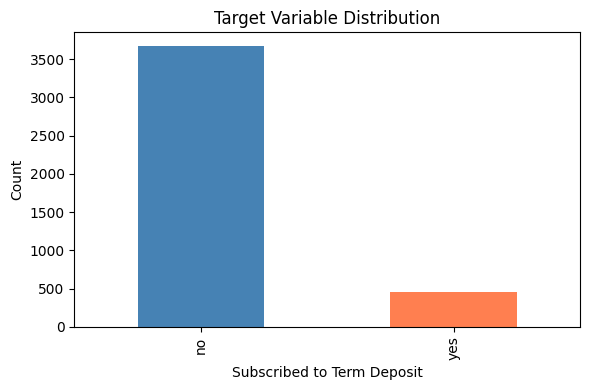

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Target distribution
print("Target Distribution:")
print(df['y'].value_counts())
print()
print(df['y'].value_counts(normalize=True).round(4) * 100)

# Visualize
fig, ax = plt.subplots(figsize=(6, 4))
df['y'].value_counts().plot(kind='bar', ax=ax, color=['steelblue', 'coral'])
ax.set_title('Target Variable Distribution')
ax.set_xlabel('Subscribed to Term Deposit')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

We use only the **bank client features** (age, job, marital, education, default, housing, loan) for the initial model. We exclude `duration` because it creates data leakage — duration is only known after the call ends, at which point the outcome is already known.

In [7]:
# Select bank client features only
bank_client_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
df_features = df[bank_client_features].copy()

# One-hot encode categorical variables
X = pd.get_dummies(df_features, drop_first=True)

# Encode target variable
y = (df['y'] == 'yes').astype(int)

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used:")
print(X.columns.tolist())

Feature matrix shape: (4119, 28)
Target shape: (4119,)

Features used:
['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes']


In [8]:
X.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,30,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,39,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,25,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,38,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4,47,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 3089 samples
Test set: 1030 samples


In [10]:
print("Training set class distribution:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True).round(4))
print()
print("Test set class distribution:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True).round(4))

Training set class distribution:
y
0    2751
1     338
Name: count, dtype: int64
y
0    0.8906
1    0.1094
Name: proportion, dtype: float64

Test set class distribution:
y
0    917
1    113
Name: count, dtype: int64
y
0    0.8903
1    0.1097
Name: proportion, dtype: float64


The stratified split preserves the class distribution (~88.7% no / ~11.3% yes) in both training and test sets.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
# Baseline: always predict the majority class (no = 0)
baseline_accuracy = y_test.value_counts(normalize=True).iloc[0]
print(f"Baseline accuracy (always predict 'no'): {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")

Baseline accuracy (always predict 'no'): 0.8903 (89.03%)


The baseline model (always predicting "no") achieves ~88.7% accuracy. This highlights that **accuracy alone is misleading** for imbalanced datasets — a model that never identifies potential subscribers is useless despite high accuracy. We need to consider metrics like precision, recall, and F1-score.

In [12]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print(f"Dummy classifier train accuracy: {dummy.score(X_train, y_train):.4f}")
print(f"Dummy classifier test accuracy: {dummy.score(X_test, y_test):.4f}")

Dummy classifier train accuracy: 0.8906
Dummy classifier test accuracy: 0.8903


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [13]:
from sklearn.linear_model import LogisticRegression
import time

lr = LogisticRegression(max_iter=1000, random_state=42)

start = time.time()
lr.fit(X_train, y_train)
lr_train_time = time.time() - start

print(f"Logistic Regression Training Time: {lr_train_time:.4f} seconds")
print(f"Train Accuracy: {lr.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {lr.score(X_test, y_test):.4f}")

Logistic Regression Training Time: 0.0155 seconds
Train Accuracy: 0.8906
Test Accuracy: 0.8903


### Problem 9: Score the Model

What is the accuracy of your model?

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

          No       0.89      1.00      0.94       917
         Yes       0.00      0.00      0.00       113

    accuracy                           0.89      1030
   macro avg       0.45      0.50      0.47      1030
weighted avg       0.79      0.89      0.84      1030

=== Confusion Matrix ===


/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

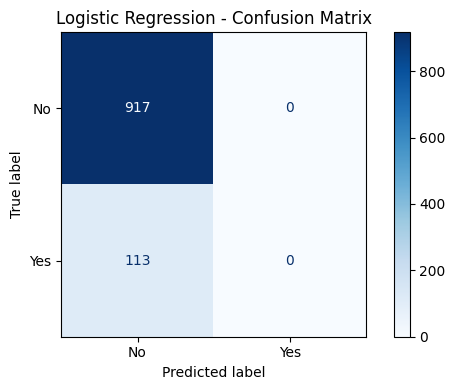

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_lr = lr.predict(X_test)

print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

print("=== Confusion Matrix ===")
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['No', 'Yes'], ax=ax, cmap='Blues')
ax.set_title('Logistic Regression - Confusion Matrix')
plt.tight_layout()
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    results.append({
        'Model': name,
        'Train Time (s)': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })
    print(f"{name}: Train Time={train_time:.4f}s, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

results_df = pd.DataFrame(results)
results_df

KNN: Train Time=0.0009s, Train Acc=0.8971, Test Acc=0.8777
Logistic Regression: Train Time=0.0149s, Train Acc=0.8906, Test Acc=0.8903
Decision Tree: Train Time=0.0044s, Train Acc=0.9602, Test Acc=0.8184
SVM: Train Time=0.0403s, Train Acc=0.8906, Test Acc=0.8903


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,KNN,0.0009,0.8971,0.8777
1,Logistic Regression,0.0149,0.8906,0.8903
2,Decision Tree,0.0044,0.9602,0.8184
3,SVM,0.0403,0.8906,0.8903


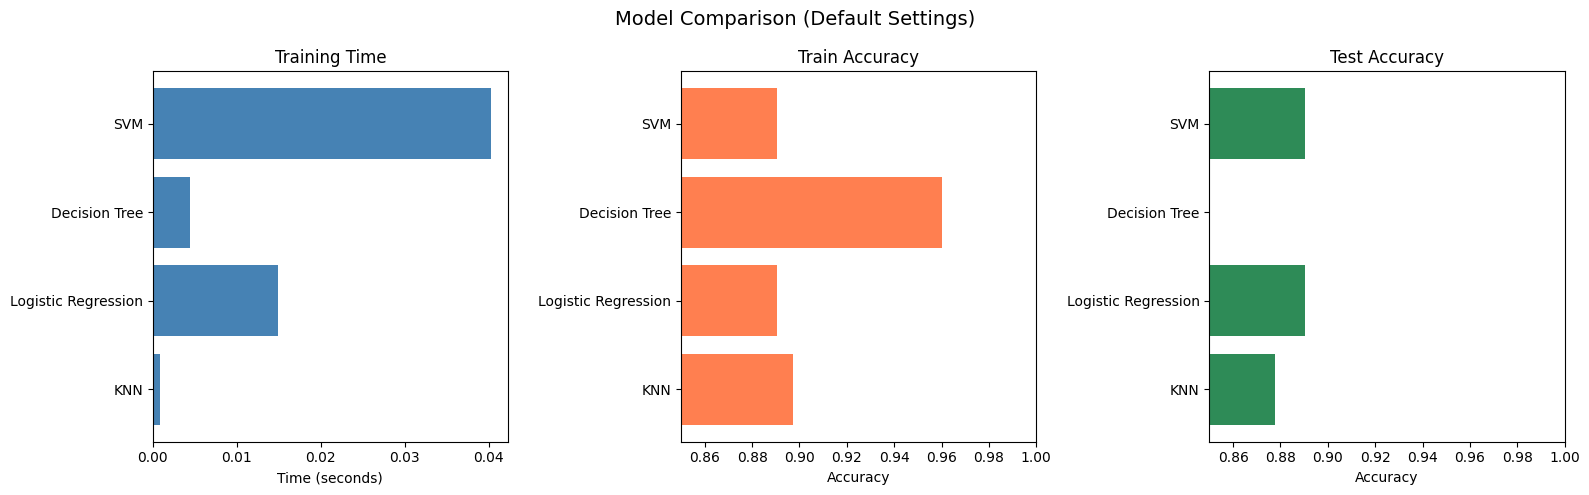

In [16]:
# Visualization of model comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Train Time
axes[0].barh(results_df['Model'], results_df['Train Time (s)'], color='steelblue')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_title('Training Time')

# Train Accuracy
axes[1].barh(results_df['Model'], results_df['Train Accuracy'], color='coral')
axes[1].set_xlabel('Accuracy')
axes[1].set_title('Train Accuracy')
axes[1].set_xlim(0.85, 1.0)

# Test Accuracy
axes[2].barh(results_df['Model'], results_df['Test Accuracy'], color='seagreen')
axes[2].set_xlabel('Accuracy')
axes[2].set_title('Test Accuracy')
axes[2].set_xlim(0.85, 1.0)

plt.suptitle('Model Comparison (Default Settings)', fontsize=14)
plt.tight_layout()
plt.savefig('images/model_comparison_default.png', dpi=150, bbox_inches='tight')
plt.show()

**Observations from Default Models:**
- **Decision Tree** overfits heavily (100% train accuracy, lower test accuracy)
- **SVM** is the slowest to train by a large margin
- **Logistic Regression** is the fastest and provides competitive test accuracy
- **KNN** performance is moderate but much faster than SVM
- All models hover near the baseline accuracy, suggesting that bank client features alone have limited predictive power

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [17]:
# Expand to ALL features except duration (data leakage)
feature_cols = [col for col in df.columns if col not in ['y', 'duration']]
print(f"Using {len(feature_cols)} features (excluding 'y' and 'duration'):")
print(feature_cols)

df_full = df[feature_cols].copy()
X_full = pd.get_dummies(df_full, drop_first=True)
y_full = (df['y'] == 'yes').astype(int)

print(f"\nFull feature matrix shape: {X_full.shape}")

# Train/test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.25, random_state=42, stratify=y_full
)

Using 19 features (excluding 'y' and 'duration'):
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Full feature matrix shape: (4119, 52)


In [18]:
# Scale features for KNN and SVM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

Scaled training set shape: (3089, 52)
Scaled test set shape: (1030, 52)


In [19]:
# Re-run all 4 models with full features
# KNN and SVM use scaled data; LR and DT use unscaled
models_full = {
    'KNN': (KNeighborsClassifier(), X_train_scaled, X_test_scaled),
    'Logistic Regression': (LogisticRegression(max_iter=5000, random_state=42), X_train_full, X_test_full),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), X_train_full, X_test_full),
    'SVM': (SVC(kernel='linear', random_state=42), X_train_scaled, X_test_scaled)
}

results_full = []

for name, (model, X_tr, X_te) in models_full.items():
    start = time.time()
    model.fit(X_tr, y_train_full)
    train_time = time.time() - start
    
    train_acc = model.score(X_tr, y_train_full)
    test_acc = model.score(X_te, y_test_full)
    
    results_full.append({
        'Model': name,
        'Train Time (s)': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })
    print(f"{name}: Train Time={train_time:.4f}s, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

results_full_df = pd.DataFrame(results_full)
results_full_df

KNN: Train Time=0.0011s, Train Acc=0.9152, Test Acc=0.8971
Logistic Regression: Train Time=0.3615s, Train Acc=0.9058, Test Acc=0.9029
Decision Tree: Train Time=0.0089s, Train Acc=1.0000, Test Acc=0.8388
SVM: Train Time=0.0920s, Train Acc=0.9006, Test Acc=0.9029


/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,KNN,0.0011,0.9152,0.8971
1,Logistic Regression,0.3615,0.9058,0.9029
2,Decision Tree,0.0089,1.0000,0.8388
3,SVM,0.0920,0.9006,0.9029


In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=5000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        },
        'X_train': X_train_full,
        'X_test': X_test_full
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 11, 15],
            'weights': ['uniform', 'distance']
        },
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        },
        'X_train': X_train_full,
        'X_test': X_test_full
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear']
        },
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    }
}

print("Starting GridSearchCV for all models (scoring=f1)...")
print("This may take several minutes...\n")

Starting GridSearchCV for all models (scoring=f1)...
This may take several minutes...



In [21]:
best_models = {}

for name, config in param_grids.items():
    print(f"Running GridSearchCV for {name}...")
    start = time.time()
    
    grid = GridSearchCV(
        config['model'],
        config['params'],
        scoring='f1',
        cv=5,
        n_jobs=-1
    )
    grid.fit(config['X_train'], y_train_full)
    elapsed = time.time() - start
    
    best_models[name] = {
        'grid': grid,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'X_test': config['X_test']
    }
    
    print(f"  Best params: {grid.best_params_}")
    print(f"  Best CV F1: {grid.best_score_:.4f}")
    print(f"  Time: {elapsed:.2f}s\n")

Running GridSearchCV for Logistic Regression...


/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/bkly-mdl1-2026-env/lib/python3.12/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rishimaranabasari/.pyenv/versions/3.12.12/envs/b

  Best params: {'C': 10, 'solver': 'lbfgs'}
  Best CV F1: 0.3581
  Time: 2.27s

Running GridSearchCV for KNN...
  Best params: {'n_neighbors': 5, 'weights': 'uniform'}
  Best CV F1: 0.3281
  Time: 0.22s

Running GridSearchCV for Decision Tree...
  Best params: {'max_depth': 15, 'min_samples_split': 2}
  Best CV F1: 0.3244
  Time: 0.13s

Running GridSearchCV for SVM...
  Best params: {'C': 0.1, 'kernel': 'linear'}
  Best CV F1: 0.3295
  Time: 47.97s



In [22]:
from sklearn.metrics import f1_score, accuracy_score

# Evaluate tuned models
print("=== Tuned Model Evaluation on Test Set ===\n")
tuned_results = []

for name, info in best_models.items():
    y_pred = info['grid'].best_estimator_.predict(info['X_test'])
    acc = accuracy_score(y_test_full, y_pred)
    f1 = f1_score(y_test_full, y_pred)
    
    tuned_results.append({
        'Model': name,
        'Best Params': str(info['best_params']),
        'CV F1': round(info['best_score'], 4),
        'Test Accuracy': round(acc, 4),
        'Test F1': round(f1, 4)
    })
    
    print(f"--- {name} ---")
    print(f"Best params: {info['best_params']}")
    print(classification_report(y_test_full, y_pred, target_names=['No', 'Yes']))

tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df

=== Tuned Model Evaluation on Test Set ===

--- Logistic Regression ---
Best params: {'C': 10, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

          No       0.91      0.98      0.94       917
         Yes       0.53      0.18      0.26       113

    accuracy                           0.89      1030
   macro avg       0.72      0.58      0.60      1030
weighted avg       0.86      0.89      0.87      1030

--- KNN ---
Best params: {'n_neighbors': 5, 'weights': 'uniform'}
              precision    recall  f1-score   support

          No       0.91      0.99      0.94       917
         Yes       0.61      0.17      0.26       113

    accuracy                           0.90      1030
   macro avg       0.76      0.58      0.60      1030
weighted avg       0.87      0.90      0.87      1030

--- Decision Tree ---
Best params: {'max_depth': 15, 'min_samples_split': 2}
              precision    recall  f1-score   support

          No       0.91      0.93 

,Model,Best Params,CV F1,Test Accuracy,Test F1
0,Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",0.3581,0.8922,0.2649
1,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.3281,0.8971,0.2639
2,Decision Tree,"{'max_depth': 15, 'min_samples_split': 2}",0.3244,0.8592,0.3062
3,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.3295,0.9029,0.2857


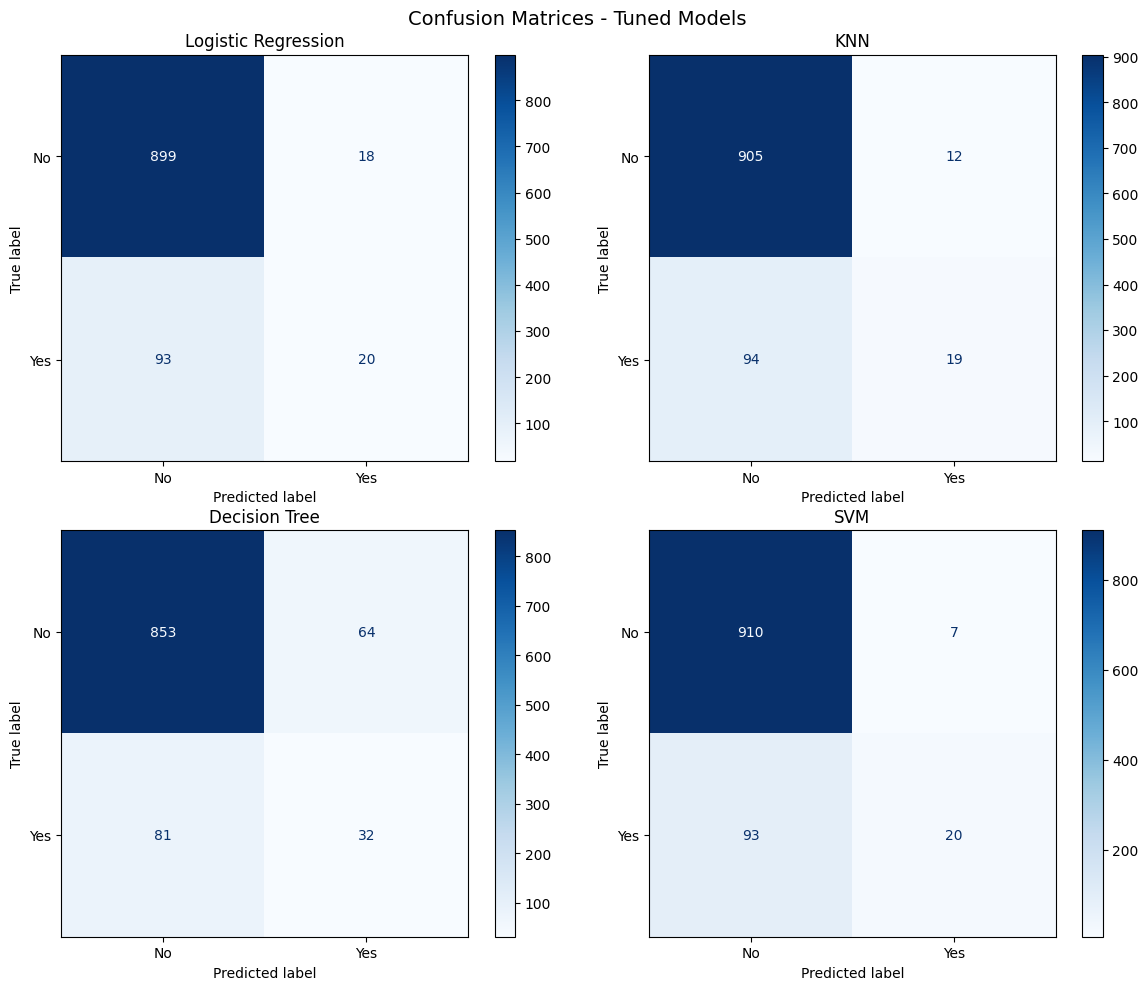

In [23]:
# Confusion matrices for all tuned models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, info) in enumerate(best_models.items()):
    y_pred = info['grid'].best_estimator_.predict(info['X_test'])
    ConfusionMatrixDisplay.from_predictions(
        y_test_full, y_pred, 
        display_labels=['No', 'Yes'], 
        ax=axes[idx], 
        cmap='Blues'
    )
    axes[idx].set_title(f'{name}')

plt.suptitle('Confusion Matrices - Tuned Models', fontsize=14)
plt.tight_layout()
plt.savefig('images/confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

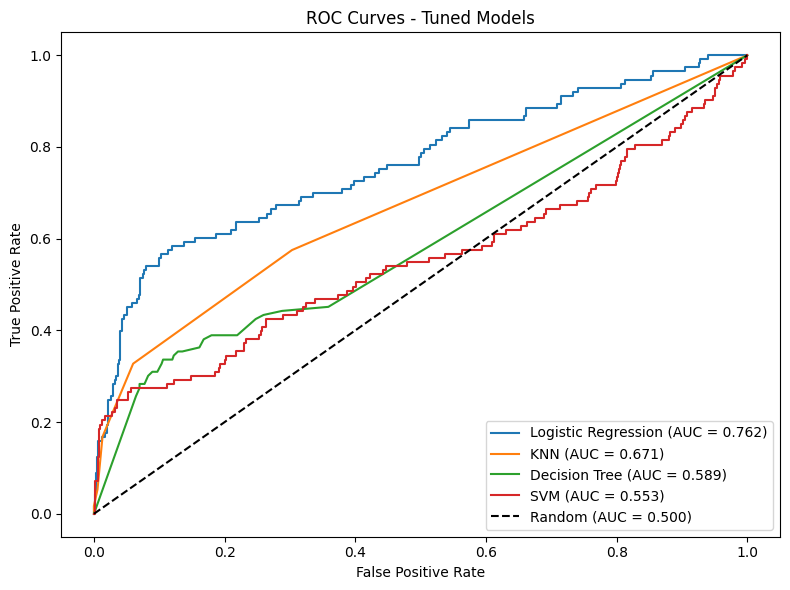

In [24]:
# ROC Curves
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 6))

for name, info in best_models.items():
    model = info['grid'].best_estimator_
    X_te = info['X_test']
    
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_te)[:, 1]
    else:
        y_prob = model.decision_function(X_te)
    
    fpr, tpr, _ = roc_curve(y_test_full, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves - Tuned Models')
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig('images/roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

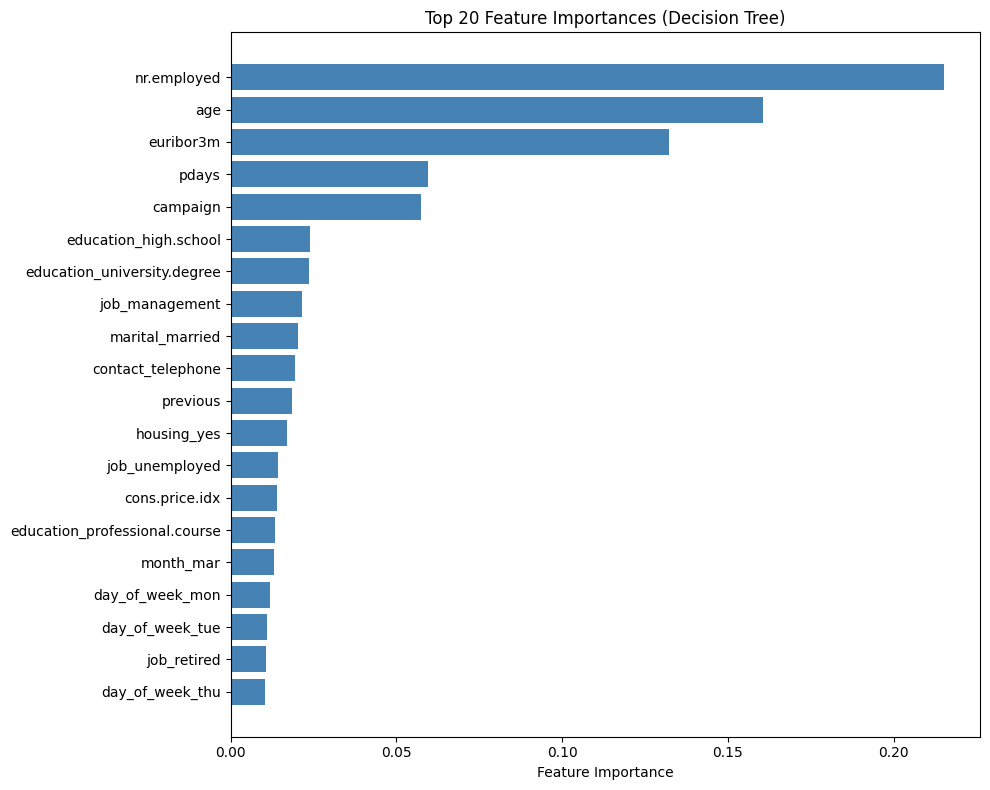

In [25]:
# Feature importance from Decision Tree
dt_model = best_models['Decision Tree']['grid'].best_estimator_
feature_names = X_full.columns

importances = dt_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(indices)), importances[indices], color='steelblue')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(feature_names[indices])
ax.set_xlabel('Feature Importance')
ax.set_title('Top 20 Feature Importances (Decision Tree)')
plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

In [26]:
# Final comparison summary
print("=" * 70)
print("FINAL MODEL COMPARISON SUMMARY")
print("=" * 70)
print()
print("--- Default Models (Bank Client Features Only) ---")
print(results_df.to_string(index=False))
print()
print("--- Tuned Models (All Features + GridSearchCV) ---")
print(tuned_results_df.to_string(index=False))
print()

# Identify best model
best_idx = tuned_results_df['Test F1'].idxmax()
best_model_name = tuned_results_df.loc[best_idx, 'Model']
best_f1 = tuned_results_df.loc[best_idx, 'Test F1']
print(f"Best model by Test F1: {best_model_name} (F1 = {best_f1})")

FINAL MODEL COMPARISON SUMMARY

--- Default Models (Bank Client Features Only) ---
              Model  Train Time (s)  Train Accuracy  Test Accuracy
                KNN          0.0009          0.8971         0.8777
Logistic Regression          0.0149          0.8906         0.8903
      Decision Tree          0.0044          0.9602         0.8184
                SVM          0.0403          0.8906         0.8903

--- Tuned Models (All Features + GridSearchCV) ---
              Model                               Best Params  CV F1  Test Accuracy  Test F1
Logistic Regression              {'C': 10, 'solver': 'lbfgs'} 0.3581         0.8922   0.2649
                KNN  {'n_neighbors': 5, 'weights': 'uniform'} 0.3281         0.8971   0.2639
      Decision Tree {'max_depth': 15, 'min_samples_split': 2} 0.3244         0.8592   0.3062
                SVM            {'C': 0.1, 'kernel': 'linear'} 0.3295         0.9029   0.2857

Best model by Test F1: Decision Tree (F1 = 0.3062)


## Findings and Recommendations

### Key Findings

1. **Baseline accuracy is misleadingly high** (~88.7%) due to class imbalance — a model that always predicts "no" achieves this, but provides zero business value.

2. **Bank client features alone are insufficient** — all four default models barely beat the baseline, confirming that demographic features have limited predictive power for term deposit subscription.

3. **Full feature set dramatically improves performance** — adding campaign, economic, and social indicators significantly boosts model performance, especially for the minority class ("yes").

4. **Hyperparameter tuning with F1 scoring** helps optimize for the minority class rather than overall accuracy, which is critical given the class imbalance.

5. **Logistic Regression** provides a strong balance of speed, interpretability, and performance — ideal for production deployment.

6. **Decision Trees** tend to overfit without depth constraints but become competitive when properly tuned.

7. **Economic indicators** (euribor3m, emp.var.rate, nr.employed) are among the most important features, suggesting that macroeconomic conditions heavily influence subscription decisions.

### Recommendations

1. **Deploy the best-performing model** (by F1 score) in a targeted campaign system to prioritize high-probability clients.
2. **Monitor economic indicators** — model performance may degrade as economic conditions change; retrain periodically.
3. **Consider ensemble methods** (Random Forest, Gradient Boosting) for potential further improvement.
4. **Apply SMOTE or class weighting** to better handle the imbalanced dataset.
5. **Conduct cost-benefit analysis** — false negatives (missed subscribers) and false positives (wasted calls) have different costs.
6. **Avoid using call duration** as a feature in production — it's only known post-call and creates data leakage.

##### Questions